tensor([32.0834, 27.7415, 23.3278, 21.7587], device='cuda:2',
       grad_fn=<SelectBackward0>) tensor([9.8697e-01, 1.2842e-02, 1.5552e-04, 3.2382e-05], device='cuda:2',
       grad_fn=<SoftmaxBackward0>)


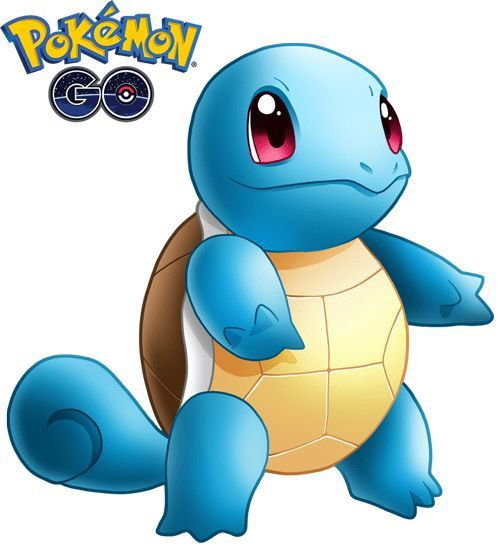

In [3]:
from PIL import Image
import requests
from transformers import AutoProcessor, CLIPModel
import numpy as np
import torch
import rp
from transformers import CLIPProcessor, CLIPModel
from clip import get_clip_logits

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
url = "https://i.pinimg.com/564x/87/a1/3e/87a13ebe6b5e4f100b84b0e68bc994d5--pokemon-cakes-pokemon-go.jpg"
image=rp.as_float_image(rp.as_rgb_image(rp.load_image(url)))
image=rp.as_torch_image(image)
image=image.to('cuda:2')

logits_per_image = get_clip_logits(image,["a photo of a squirtle","a photo of a pokemon","a photo of a pikachu",""])
probs = logits_per_image.softmax(dim=0)  # we can take the softmax to get the label probabilities
print(logits_per_image,probs)

rp.display_image(rp.load_image(url))

In [4]:
import icecream
import numpy as np
import rp
import torch
import torch.nn as nn
from easydict import EasyDict
from IPython.display import clear_output
from torchvision.transforms.functional import normalize

from bilateral_blur import BilateralProxyBlur
from learnable_textures import (LearnableImageFourier,
                                       LearnableImageFourierBilateral,
                                       LearnableImageRaster,
                                       LearnableImageRasterBilateral,
                                       LearnableTexturePackFourier,
                                       LearnableTexturePackRaster)

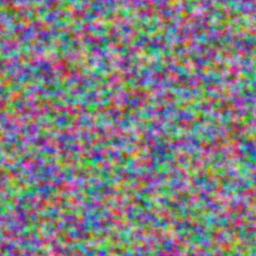

In [14]:
image = LearnableImageFourier().cuda()

def display():
    rp.display_image(rp.as_numpy_image(image()))
display()

0 tensor(5.8508, device='cuda:0', grad_fn=<MulBackward0>)


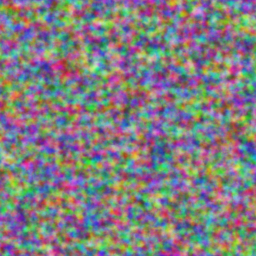

100 tensor(-47.9814, device='cuda:0', grad_fn=<MulBackward0>)


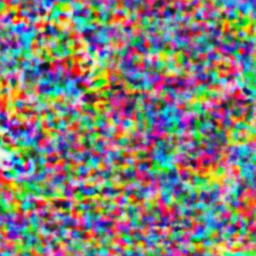

200 tensor(-53.6633, device='cuda:0', grad_fn=<MulBackward0>)


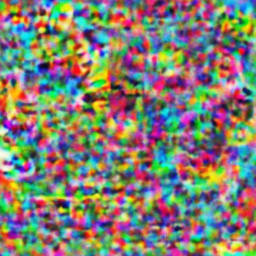

300 tensor(-57.2666, device='cuda:0', grad_fn=<MulBackward0>)


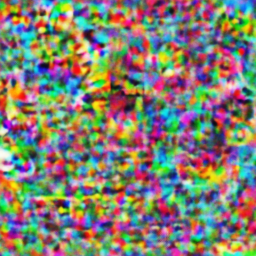

400 tensor(-61.4040, device='cuda:0', grad_fn=<MulBackward0>)


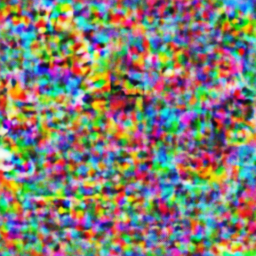

500 tensor(-63.0122, device='cuda:0', grad_fn=<MulBackward0>)


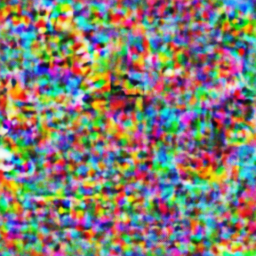

600 tensor(-59.5659, device='cuda:0', grad_fn=<MulBackward0>)


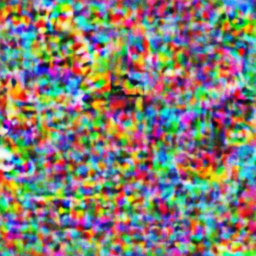

700 tensor(-64.8894, device='cuda:0', grad_fn=<MulBackward0>)


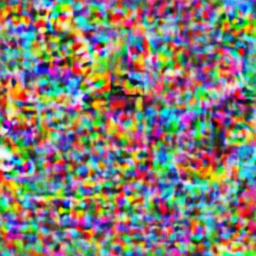

800 tensor(-65.3488, device='cuda:0', grad_fn=<MulBackward0>)


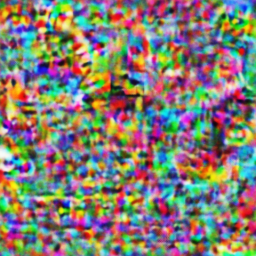

900 tensor(-65.5466, device='cuda:0', grad_fn=<MulBackward0>)


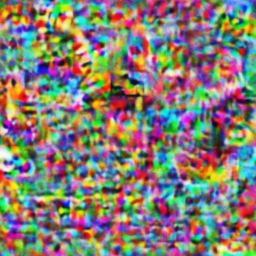

1000 tensor(-65.3294, device='cuda:0', grad_fn=<MulBackward0>)


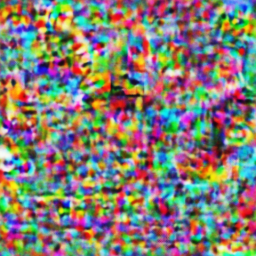

1100 tensor(-64.8506, device='cuda:0', grad_fn=<MulBackward0>)


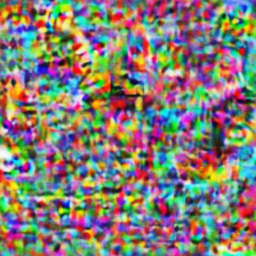

1200 tensor(-66.5499, device='cuda:0', grad_fn=<MulBackward0>)


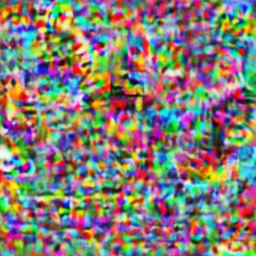

1300 tensor(-66.3065, device='cuda:0', grad_fn=<MulBackward0>)


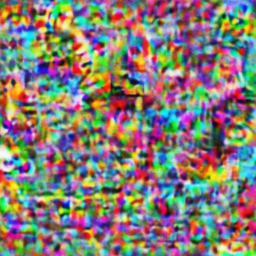

1400 tensor(-65.4440, device='cuda:0', grad_fn=<MulBackward0>)


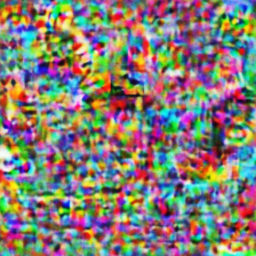

1500 tensor(-65.5654, device='cuda:0', grad_fn=<MulBackward0>)


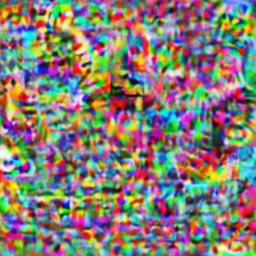

1600 tensor(-67.6762, device='cuda:0', grad_fn=<MulBackward0>)


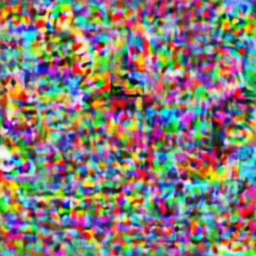

1700 tensor(-67.2640, device='cuda:0', grad_fn=<MulBackward0>)


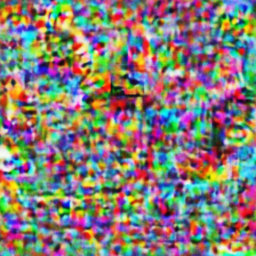

1800 tensor(-68.1209, device='cuda:0', grad_fn=<MulBackward0>)


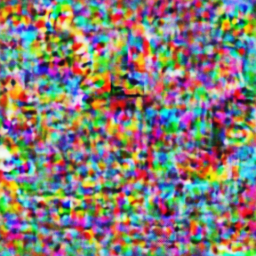

1900 tensor(-67.8058, device='cuda:0', grad_fn=<MulBackward0>)


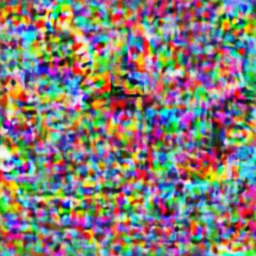

2000 tensor(-66.5674, device='cuda:0', grad_fn=<MulBackward0>)


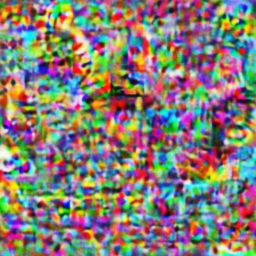

2100 tensor(-67.5774, device='cuda:0', grad_fn=<MulBackward0>)


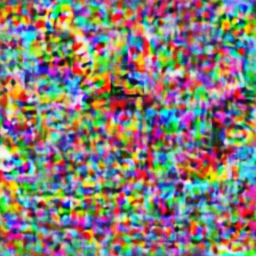

KeyboardInterrupt: 

In [15]:
prompt='a kitten in a cardboard box'

optim=torch.optim.Adam(image.parameters())
for i in range(10000):
    
    logits = get_clip_logits(image(),[prompt, ""])

    loss= - (logits[0]*1 - logits[1])
    loss=loss*1
    loss.backward()
    
    optim.step()
    optim.zero_grad()
    
    if not i%100:
        print(i, loss)
        display()

In [17]:
image()

tensor([[[0.4093, 0.3591, 0.4219,  ..., 0.6937, 0.7504, 0.7513],
         [0.4152, 0.3822, 0.4203,  ..., 0.6807, 0.7445, 0.7770],
         [0.4655, 0.4399, 0.4350,  ..., 0.5846, 0.6692, 0.7375],
         ...,
         [0.5662, 0.4850, 0.4512,  ..., 0.5796, 0.5212, 0.4586],
         [0.7270, 0.6699, 0.6455,  ..., 0.4201, 0.4127, 0.3964],
         [0.8495, 0.8149, 0.7438,  ..., 0.3077, 0.3234, 0.3273]],

        [[0.5234, 0.4291, 0.3890,  ..., 0.4213, 0.4644, 0.4217],
         [0.4799, 0.4154, 0.4014,  ..., 0.4580, 0.5299, 0.5207],
         [0.4287, 0.3780, 0.4525,  ..., 0.5211, 0.5594, 0.5819],
         ...,
         [0.4210, 0.3597, 0.3176,  ..., 0.7162, 0.7851, 0.8130],
         [0.4098, 0.3336, 0.3201,  ..., 0.6959, 0.7893, 0.8230],
         [0.4373, 0.4159, 0.4057,  ..., 0.6022, 0.7451, 0.8055]],

        [[0.5453, 0.4665, 0.4576,  ..., 0.5426, 0.5961, 0.5690],
         [0.6115, 0.5400, 0.4937,  ..., 0.6740, 0.6588, 0.5986],
         [0.6481, 0.5609, 0.5139,  ..., 0.7507, 0.6913, 0.